## Entrainement du modèle

In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image

In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [11]:
train_gen = train_datagen.flow_from_directory(
    'train', 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='categorical', 
    seed = 42
)

Found 14160 images belonging to 120 classes.


In [12]:
val_gen = val_datagen.flow_from_directory(
    'test', 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='categorical',
    seed = 42
)

Found 3600 images belonging to 120 classes.


In [13]:
train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory='train', target_size=(224,224), class_mode='categorical', batch_size=10)

Found 14160 images belonging to 120 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

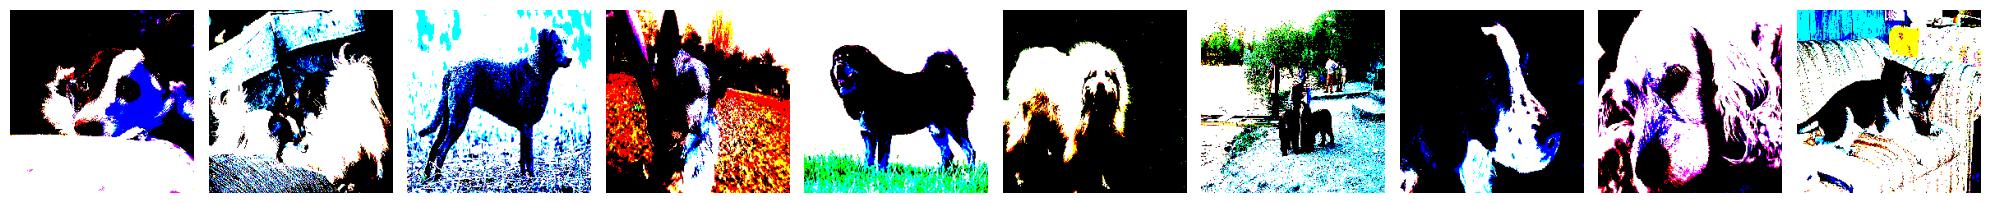

In [14]:
imgs, labels = next(train_batches)

fig, axes = plt.subplots(1, 10, figsize=(20,20))
axes = axes.flatten()
for img, ax in zip( imgs, axes):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [5]:
# Maintenant, ns travaillons sur des images, ns indiquons 
# les dim de l'image => (heigth, width, mode)
# del model

inputs = tf.keras.layers.Input(shape=(150, 150, 3))

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(128, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(256, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)

outputs = tf.keras.layers.Dense(120, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       2951

In [6]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='rmsprop')

In [3]:
history = model.fit(train_gen, epochs=15, validation_data=val_gen)

NameError: name 'model' is not defined

In [19]:
def diagnostic_learning_curves(): 
    # Retrieve a list of accuracy results on training and validation data
    # sets for each training epoch
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    # Retrieve a list of list results on training and validation data
    # sets for each training epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')

    plt.figure()

    # Plot training and validation loss per epoch
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')

Text(0.5, 1.0, 'Training and validation loss')

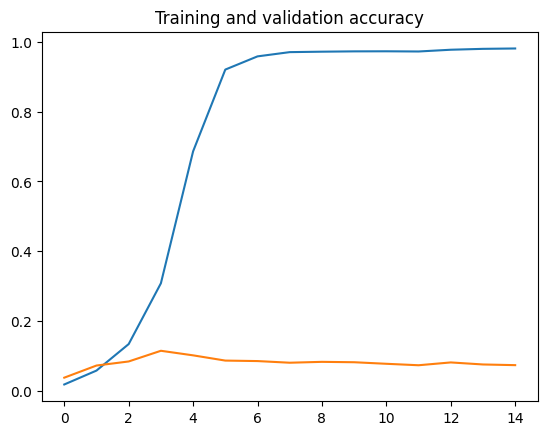

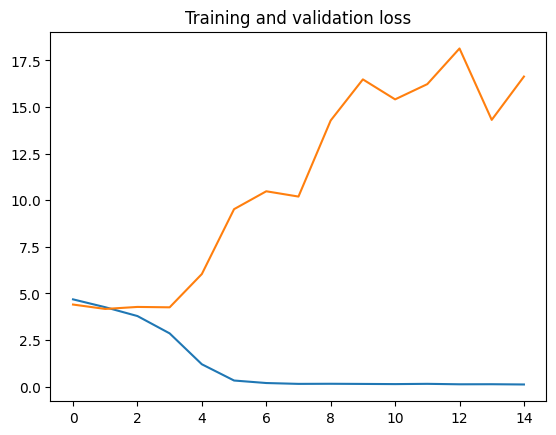

In [ ]:
diagnostic_learning_curves()

## Data augmentation

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        "train", 
        target_size=(150, 150),  
        batch_size=20,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        'test',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 14160 images belonging to 120 classes.
Found 3600 images belonging to 120 classes.


In [15]:

inputs = tf.keras.layers.Input(shape=(150, 150, 3))

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(128, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(256, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)

outputs = tf.keras.layers.Dense(120, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 256)       2951

In [16]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='rmsprop')

In [17]:
history = model.fit(
      train_generator,
      epochs=10,
      validation_data=validation_generator,
      )

Epoch 1/10
708/708 [==============================] - 575s 809ms/step - loss: 4.7906 - acc: 0.0104 - val_loss: 4.6381 - val_acc: 0.0217
Epoch 2/10
708/708 [==============================] - 545s 770ms/step - loss: 4.6017 - acc: 0.0201 - val_loss: 4.4496 - val_acc: 0.0344
Epoch 3/10
708/708 [==============================] - 551s 778ms/step - loss: 4.4610 - acc: 0.0335 - val_loss: 4.4077 - val_acc: 0.0422
Epoch 4/10
708/708 [==============================] - 548s 774ms/step - loss: 4.3414 - acc: 0.0496 - val_loss: 4.2640 - val_acc: 0.0558
Epoch 5/10
708/708 [==============================] - 556s 784ms/step - loss: 4.2523 - acc: 0.0569 - val_loss: 4.0892 - val_acc: 0.0719
Epoch 6/10
708/708 [==============================] - 565s 797ms/step - loss: 4.1736 - acc: 0.0684 - val_loss: 3.9762 - val_acc: 0.0903
Epoch 7/10
708/708 [==============================] - 693s 978ms/step - loss: 4.0995 - acc: 0.0773 - val_loss: 3.9801 - val_acc: 0.0883
Epoch 8/10
708/708 [============================

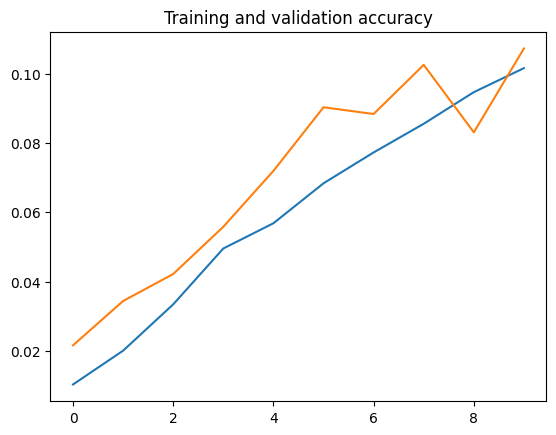

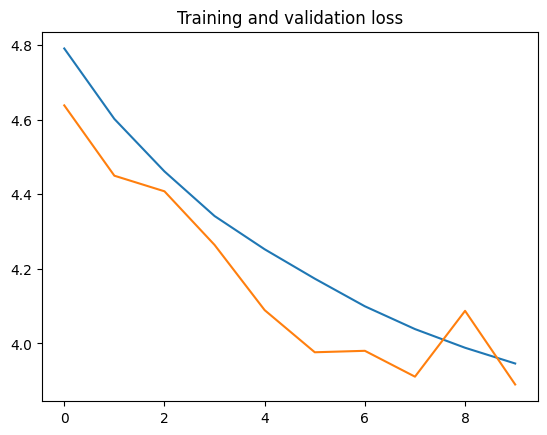

In [20]:
diagnostic_learning_curves()

## Amélioration du modèle

L'overfiting à été réglé et le modèle à une bonne courbe d'apprentissage. Maintenant nous allons ajouter des neuronnes aux couches et des itérations à l'entrainement pour améliorer la précision du modèle

In [11]:

inputs = tf.keras.layers.Input(shape=(150, 150, 3))

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(256, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(512, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(1024, activation='relu')(x)

outputs = tf.keras.layers.Dense(120, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 128)       0         
 D)                                                              
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 512)       11801

In [12]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='rmsprop')

In [14]:
history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator,
      )

Epoch 1/30
517/708 [====================>.........] - ETA: 8:02 - loss: 4.7934 - acc: 0.0074

KeyboardInterrupt: 

In [ ]:
diagnostic_learning_curves()

## Dropout

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(64, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)

outputs = layers.Dense(120, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='rmsprop')

In [ ]:
history = model.fit(
      train_generator,
      epochs=10,
      validation_data=validation_generator,
      )

In [ ]:
diagnostic_learning_curves()

## Évaluation

In [ ]:
model.evaluate(validation_generator)

In [ ]:
import pandas as pd

y_proba = model.predict(validation_generator) 
y_proba
pd.Series(y_proba.flatten()).head()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(validation_generator.classes, y_pred)
conf_mat
plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True
                      )